In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

In [4]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [5]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0


In [6]:
df.groupby('PerformanceScore')['PerfScoreID'].value_counts()

PerformanceScore   PerfScoreID
Exceeds            4.0             37
Fully Meets        3.0            243
Needs Improvement  2.0             18
PIP                1.0             12
Name: PerfScoreID, dtype: int64

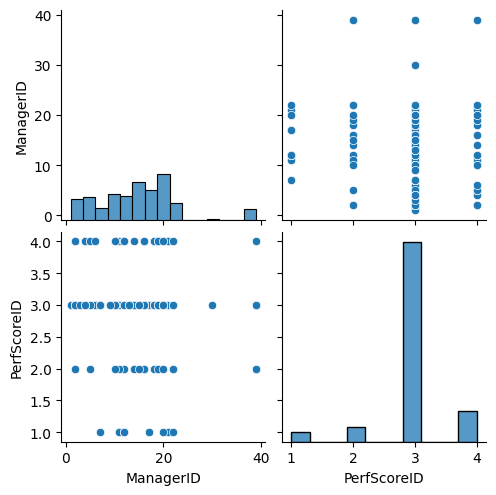

In [7]:
sns.pairplot(df[['ManagerID', 'PerfScoreID']])
plt.show()

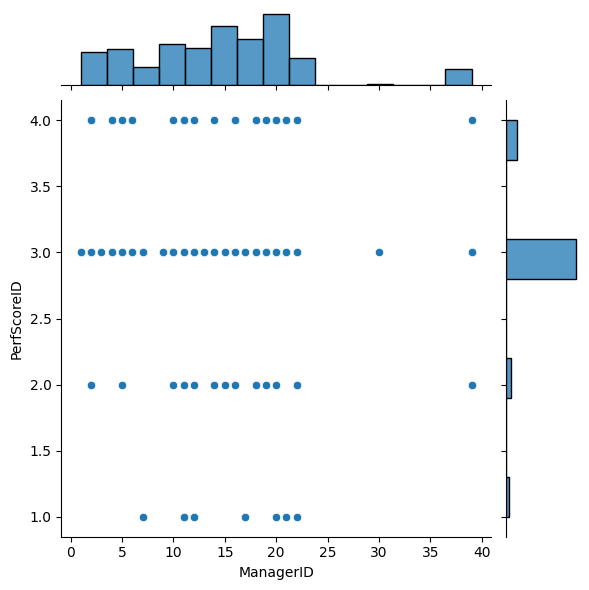

In [8]:
sns.jointplot(x='ManagerID',y='PerfScoreID',data=df)

<AxesSubplot:xlabel='ManagerID', ylabel='PerfScoreID'>

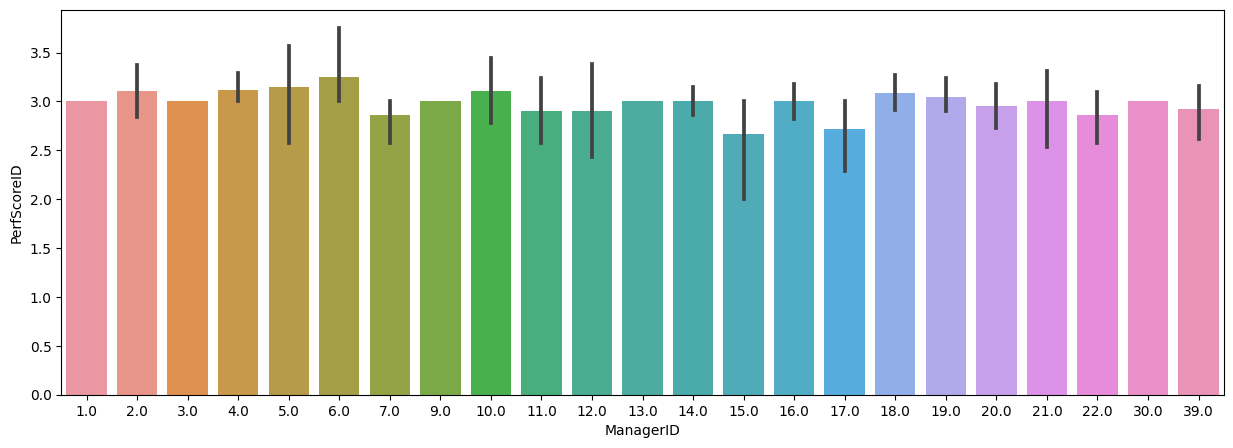

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x='ManagerID',y='PerfScoreID',data=df)

Brak wyraźnej zalezności, wszyscy oceniają pracowników na 3.0 tj. Fully Meets  

2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [14]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [15]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)


In [16]:
df['RecruitmentID'] = df.groupby('RecruitmentSource').ngroup() 

In [17]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Seniority,RecruitmentID
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,10.916035,3
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,5.722226,21
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,4.993942,8
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,0.158799,16
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,4.408030,21


RecruitmentSource                       RecruitmentID
Billboard                               0                16
Careerbuilder                           1                 1
Company Intranet - Partner              2                 1
Diversity Job Fair                      3                29
Employee Referral                       4                31
Glassdoor                               5                14
Indeed                                  6                 8
Information Session                     7                 4
Internet Search                         8                 6
MBTA ads                                9                17
Monster.com                             10               24
Newspager/Magazine                      11               18
On-campus Recruiting                    12               12
On-line Web application                 13                1
Other                                   14                9
Pay Per Click                           15    

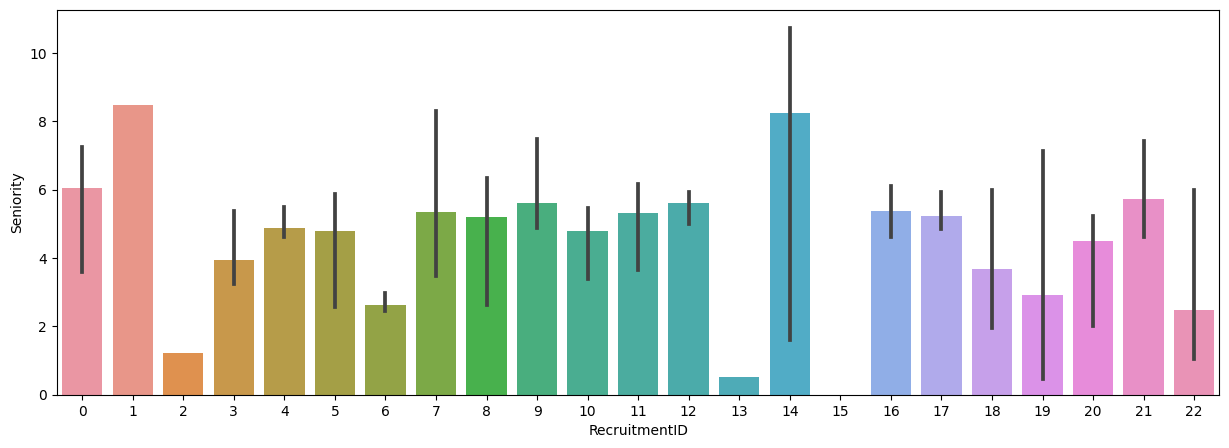

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='RecruitmentID',y='Seniority',data=df, estimator=np.median)
display(df.groupby('RecruitmentSource')['RecruitmentID'].value_counts())

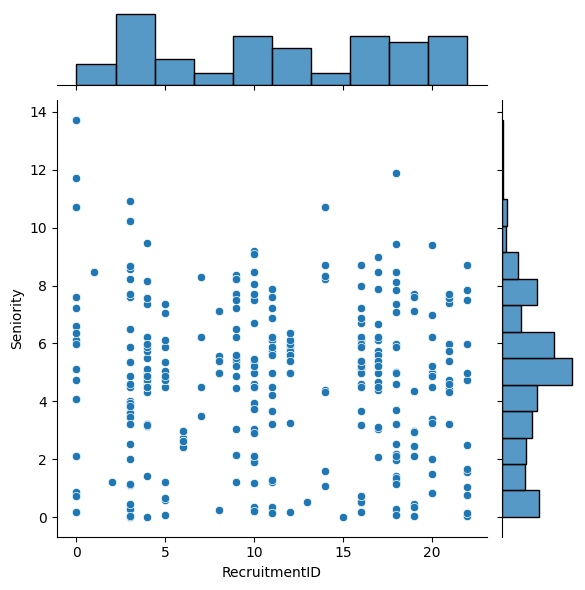

In [23]:
sns.jointplot(x='RecruitmentID',y='Seniority',data=df)

<AxesSubplot:xlabel='RecruitmentID', ylabel='Seniority'>

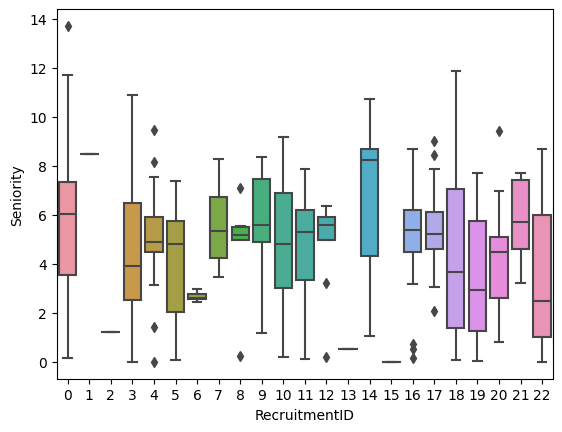

In [24]:
sns.boxplot(x='RecruitmentID',y='Seniority',data=df)

Najlepsze źródła pozyskania pracownika (w odniesieniu do długości stażu) to 0,9,21.

3. Czy stan cywilny ( MartialDesc ) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy ( EmpSatisfaction )?

<AxesSubplot:>

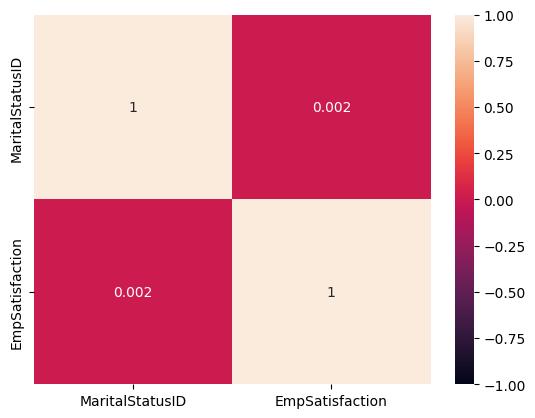

In [25]:
sns.heatmap(df[['MaritalStatusID', 'EmpSatisfaction']].corr(), vmin=-1, vmax=1, annot=True)


MaritalStatusID  MaritalDesc
0.0              Single         137
1.0              Married        123
2.0              Divorced        30
3.0              Separated       12
4.0              Widowed          8
Name: MaritalDesc, dtype: int64

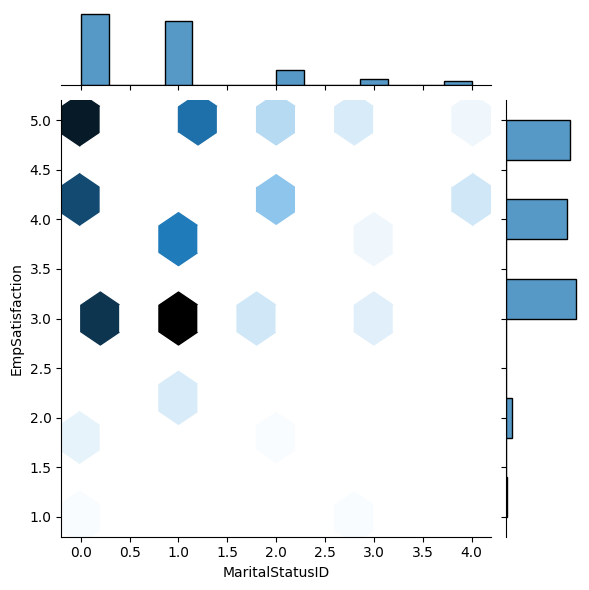

In [26]:
sns.jointplot(x='MaritalStatusID',y='EmpSatisfaction',data=df,kind='hex')
df.groupby('MaritalStatusID')['MaritalDesc'].value_counts()

Powiedziałym że single oczywiście są najbardziej zadowoleni z pracy ale cyferki pokazują, że korelacji brak.

4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [35]:
from datetime import date
def age(row):
    ur=row['DOB']
    day=dt.datetime(2019,9,27)
    return day.year - ur.year - ((day.month, day.day) < (ur.month, ur.day))

In [37]:
df['Wiek'] = df.apply(lambda row: age(row),axis=1)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Seniority,RecruitmentID,Wiek
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,10.916035,3,31
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,5.722226,21,35
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,4.993942,8,33
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,0.158799,16,34
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,4.408030,21,31


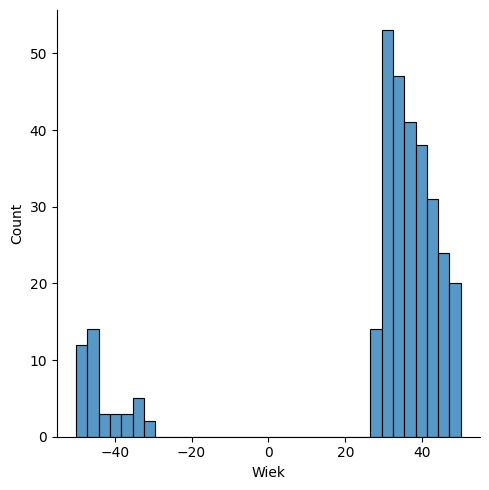

In [58]:
sns.displot(df['Wiek'])

In [40]:
df_wiek=df[(df.Wiek>0) & (pd.isnull(df['DateofTermination']))]
df_wiek['Wiek']

0      31
1      35
2      33
4      31
8      32
       ..
300    32
302    33
306    33
307    36
309    41
Name: Wiek, Length: 181, dtype: int64

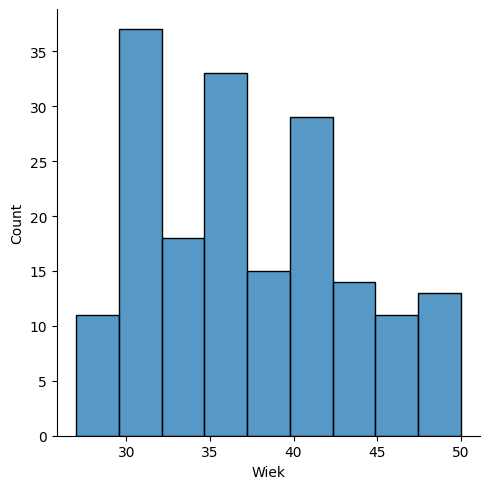

In [42]:
sns.displot(df_wiek['Wiek'])

JW

5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

SpecialProjectsCount  SpecialProjectsCount
0.0                   0.0                     242
2.0                   2.0                       1
3.0                   3.0                       2
4.0                   4.0                       9
5.0                   5.0                      21
6.0                   6.0                      21
7.0                   7.0                      12
8.0                   8.0                       2
Name: SpecialProjectsCount, dtype: int64

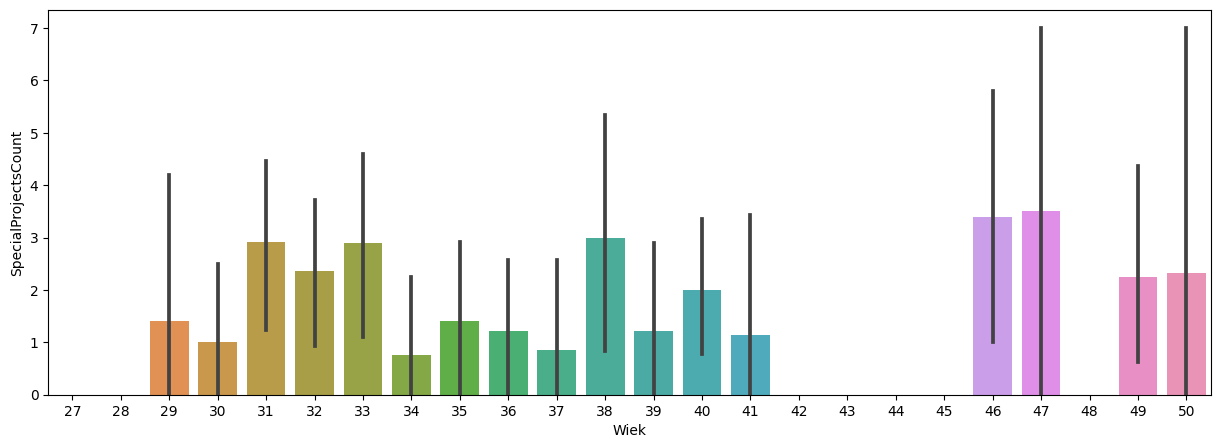

In [57]:
plt.figure(figsize=(15,5))
sns.barplot(x='Wiek',y='SpecialProjectsCount',data=df_wiek)
display(df.groupby('SpecialProjectsCount')['SpecialProjectsCount'].value_counts())

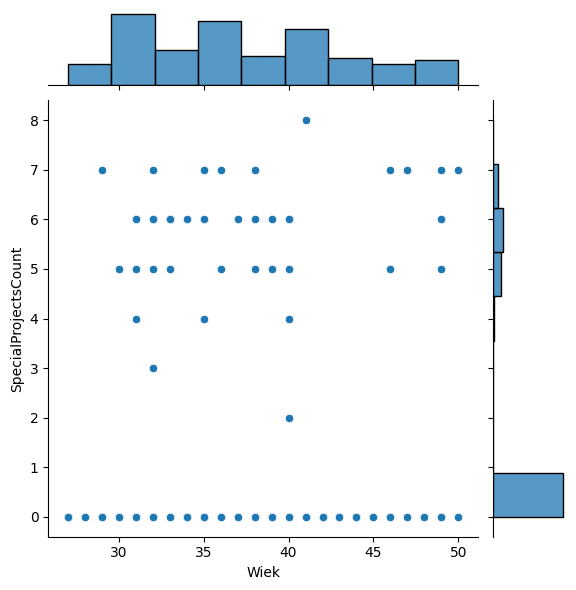

In [56]:
sns.jointplot(x='Wiek',y='SpecialProjectsCount',data=df_wiek)

Nie, starsi pracownicy nie realizują większej ilości projektów specjalnych